# Proyek Analisis Data: Bike Sharing Dataset

- **Nama:** Achmad Fariz Rizky Yanuar
- **Email:** 03achmadfariz@gmail.com
- **ID Dicoding:** fcrizz

## Menentukan Pertanyaan Bisnis

1.  Bagaimana rata-rata penyewaan pada setiap musim?
2. Bagaimana rata-rata penyewaan sepeda pada hari kerja dan hari libur?
3. Bagaimana distribusi permintaan peminjaman sepeda pada hari kerja dan hari libur?
4. Analisis lanjutan: Bagaimana pola penggunaan sepeda berdasarkan hasil clustering tiap jamnya?

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Data Wrangling

### Gathering Data


proses pengumpulan data yang ada untuk dianalsis

In [2]:
bike_df_day = pd.read_csv('day.csv')
bike_df_hour =  pd.read_csv('hour.csv')

In [3]:
bike_df_day.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
bike_df_hour.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
bike_df = bike_df_hour

Baca dataset "hour.csv" dan simpan ke dalam variabel bike_df sebagai dataframe kita nanti. Selanjutnya, tampilkan 5 samples teratas dari bike_df

**Insight**:
- Dataset bike-sharing terdiri dari dua file berformat CSV, yaitu hour.csv dan day.csv.
- Kedua dataset ini mencatat data bike-sharing selama dua tahun, yakni 2011 dan 2012.
- Terdapat berbagai fitur dalam kedua dataset, seperti tanggal, musim, hari, kondisi cuaca, jumlah penyewa, dan lainnya.
- Berdasarkan pertanyaan bisnis saya, saya memilih untuk memproses data bike-sharing per jam (hour.csv) karena lebih lengkap.

### Assesing Data

pada tahap ini, kita dapat menilai data yang ada, seperti melihat apakah ada null values, dsb.

#### Menilai tabel `bike_df`




In [6]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Melihat info dari dataset bike. Terdapat list kolom-kolom yang ada di dataset berserta jumlah nilai yang tidak null dan tipe data kolom tersebut

In [7]:
bike_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


Melakukan pengecekkan jumlah dari nilai NaN. Hasilnya, tidak ditemukan NaN values di dalam dataset ini

In [8]:
print("Jumlah duplikasi:", bike_df.duplicated().sum())

Jumlah duplikasi: 0


Tidak ditemukan pula duplikasi data

In [9]:
bike_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Dengan menggunakan desribe() kita bisa melihat count, mean, std, min, max dan 3 kuartil dari setiap kolom yang memilki tipe data numerik.

#### Modifikasi tabel 'bike_df'

In [10]:
bike_df.rename(columns={'dteday': 'datetimes', 'yr': 'year', 'mnth': 'month', 'hr': 'hour', 'weathersit': 'weathersituation', 'cnt': 'count'}, inplace=True)
bike_df.head(3)


,instant,datetimes,season,year,month,hour,holiday,weekday,workingday,weathersituation,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32


ubah nama kolom menjadi lebih mudah dimengerti

**Insights:**

**1. Kualitas Data**
- Tidak ada missing values: Semua kolom memiliki jumlah non-null yang sama dengan total data, sehingga tidak perlu imputasi data yang hilang.
- Tidak ada duplikasi: Data bersih dari duplikasi, sehingga tidak perlu dilakukan penghapusan entri duplikat.
- Format data: Kolom `datetimes` masih dalam format `object`, sehingga perlu dikonversi ke format `datetime` untuk analisis berbasis waktu.

**2. Distribusi dan Pola Data**
- Jumlah data yang seimbang Data terbagi cukup merata berdasarkan tahun (`year` = 0 dan 1), yang berarti data mencakup dua tahun penuh (2011 dan 2012).
- Sebaran peminjaman sepeda (`count`)
  - Rata-rata peminjaman per jam adalah 189 sepeda, dengan standar deviasi 181 yang menunjukkan adanya variasi yang besar dalam jumlah peminjaman.
  - Jumlah minimum peminjaman adalah 1, sedangkan maksimum mencapai 977, menunjukkan adanya jam-jam dengan lonjakan tinggi dalam pemakaian.
  - Perbedaan antara kuartil 25% (40 peminjaman) dan kuartil 75% (281 peminjaman) menunjukkan distribusi data yang cukup lebar.

**3. Faktor Musiman & Waktu**
- Musim berpengaruh terhadap peminjaman:
  - Rentang nilai `season` (1 hingga 4) menunjukkan adanya distribusi sepanjang musim. Perlu dicek apakah ada pola tertentu dalam peminjaman berdasarkan musim tertentu.
- Bulan dan jam memiliki peran penting:
  - `month` bervariasi dari 1 hingga 12, menandakan cakupan sepanjang tahun.
  - `hour` menunjukkan variasi dari 0 hingga 23, yang memungkinkan analisis pola peminjaman berdasarkan jam tertentu (misalnya, peak hours vs non-peak hours).
- Hari kerja vs akhir pekan:
  - Kolom `workingday` memiliki nilai biner (0 atau 1), yang bisa digunakan untuk melihat perbedaan peminjaman antara hari kerja dan hari libur.

**4. Kondisi Cuaca**
- Variabel cuaca (`weathersituation`, `temp`, `atemp`, `hum`, `windspeed`)
  - `temp` dan `atemp` memiliki distribusi antara 0,02 - 1, dengan rata-rata sekitar 0,5. Ini berarti nilai suhu telah dinormalisasi.
  - `hum` (kelembaban) memiliki distribusi antara 0 - 1, dengan rata-rata 0,63.
  - `windspeed` juga dinormalisasi antara 0 - 0,85.

**5. Pengguna Casual vs Registered**
- Pengguna `casual` (non-terdaftar) vs `registered` (terdaftar)
  - Jumlah peminjaman dari pengguna `registered` jauh lebih besar dibandingkan `casual`, dengan mean 153 vs 35.
  - Hal ini menunjukkan bahwa mayoritas pengguna adalah pelanggan tetap, bukan peminjam sepeda sesekali.


### Cleaning data



In [11]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instant           17379 non-null  int64  
 1   datetimes         17379 non-null  object 
 2   season            17379 non-null  int64  
 3   year              17379 non-null  int64  
 4   month             17379 non-null  int64  
 5   hour              17379 non-null  int64  
 6   holiday           17379 non-null  int64  
 7   weekday           17379 non-null  int64  
 8   workingday        17379 non-null  int64  
 9   weathersituation  17379 non-null  int64  
 10  temp              17379 non-null  float64
 11  atemp             17379 non-null  float64
 12  hum               17379 non-null  float64
 13  windspeed         17379 non-null  float64
 14  casual            17379 non-null  int64  
 15  registered        17379 non-null  int64  
 16  count             17379 non-null  int64 

#### Ubah data type


In [12]:
print(bike_df["datetimes"].dtypes)

object


Kita bisa lihat di sini datetimes masih bertipe data onject, sebaiknya kita ubah tipe datanya

In [13]:
bike_df["datetimes"] = pd.to_datetime(bike_df["datetimes"])
print(bike_df["datetimes"].dtypes)

datetime64[ns]


tipe data kolom datetimes telah bertipe data datetime64

**Insights :**
1.  Tidak ada missing values pada dataset, sehingga tidak ada kebutuhan untuk imputasi data yang hilang.
2. feature datetimes dapat diubah jenis datanya menjadi `datetime64[ns]` yang awalnya adalah object.

## Exploratory Data Analysis (EDA)

#### Explore `bike_df`

In [14]:
bike_df.sample(5)

,instant,datetimes,season,year,month,hour,holiday,weekday,workingday,weathersituation,temp,atemp,hum,windspeed,casual,registered,count
14471,14472,2012-08-31,3,1,8,4,0,5,1,1,0.64,0.5758,0.89,0.1343,0,7,7
1482,1483,2011-03-07,1,0,3,3,0,1,1,1,0.20,0.1515,0.80,0.5821,0,1,1
471,472,2011-01-21,1,0,1,16,0,5,1,1,0.16,0.1364,0.26,0.3582,0,97,97
13736,13737,2012-07-31,3,1,7,13,0,2,1,1,0.80,0.7576,0.55,0.2836,69,219,288
5007,5008,2011-08-01,3,0,8,13,0,1,1,1,0.90,0.8030,0.31,0.2985,38,112,150


melakukan sampling 5 sample acak di dataset

In [15]:
bike_df.describe(include="all")

,instant,datetimes,season,year,month,hour,holiday,weekday,workingday,weathersituation,temp,atemp,hum,windspeed,casual,registered,count
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


melihat deksripsi data. `include="all"` artinya kita juga memasukan kolom yang datanya non-numerik

In [16]:
# unregistered = count - registered
bike_df['unregistered'] = bike_df['count'] - bike_df['registered']

# susun urutan
order = ['instant', 'datetimes', 'season', 'year', 'month', 'hour', 'holiday', 'weekday', 'workingday', 'weathersituation', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'unregistered', 'count']
bike_df = bike_df[order]
bike_df.head()

,instant,datetimes,season,year,month,hour,holiday,weekday,workingday,weathersituation,temp,atemp,hum,windspeed,casual,registered,unregistered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,3,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,8,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,5,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,3,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,0,1


kita lihat ada kolom registered, tetapi tidak ada kolom yang menunjukkan jumlah unregistered. Maka dari itu, kita bisa buat kolom unregistered dengan melakukan proses aritmatika count - registered

In [17]:
bike_df.groupby(by="season").agg({
    "instant": "nunique",
    "count": ["max", "min", "mean"]
})

instant count                
       nunique   max min        mean
season                              
1         4242   801   1  111.114569
2         4409   957   1  208.344069
3         4496   977   1  236.016237
4         4232   967   1  198.868856

Di sini kita melihat distribusi data dari setiap seasonnya

In [18]:
bike_df.groupby(by="year").agg({
    "instant": "nunique",
    "count": ["max", "min", "mean"]
})

instant count                
     nunique   max min        mean
year                              
0       8645   651   1  143.794448
1       8734   977   1  234.666361

Di sini kita melihat distribusi data dari setiap tahunnya

In [19]:
bike_df.groupby(by="weathersituation").agg({
    "instant": "nunique",
    "count": ["max", "min", "mean"]
})

instant count                
                 nunique   max min        mean
weathersituation                              
1                  11413   977   1  204.869272
2                   4544   957   1  175.165493
3                   1419   891   1  111.579281
4                      3   164  23   74.333333

Di sini kita melihat distribusi data dari setiap situasi cuacanya

In [20]:
bike_df.groupby(by="workingday").agg({
    "instant": "nunique",
    "count": ["max", "min", "mean"]
})

instant count                
           nunique   max min        mean
workingday                              
0             5514   783   1  181.405332
1            11865   977   1  193.207754

Di sini kita melihat distribusi data dari setiap hari kerja dan hari libur

In [21]:
bike_df.groupby(by=["year"]).agg({
    "registered": lambda x: math.ceil(x.mean()),
    "unregistered": lambda x: math.ceil(x.mean()),
    "count": lambda x: math.ceil(x.mean())
}).reset_index()

,year,registered,unregistered,count
0,0,116,29,144
1,1,192,43,235


Di sini kita melihat rata-rata distribusi data dari setiap tahunnya untuk tiap pengguna registered dan unregistered

**Insights:**

**1. Tren Penggunaan Sepeda Berdasarkan Musim (Season)**
- Penggunaan sepeda tertinggi terjadi di musim 3 `(season = 3)` atau gugur dengan rata-rata 236 pengguna per jam.
- Musim panas `(season = 2)` juga memiliki angka penggunaan yang tinggi, rata-rata 208 pengguna per jam.
- Penggunaan terendah terjadi di musim semi` (season = 1)`, dengan rata-rata 111 pengguna per jam.
- Perbedaan ini kemungkinan dipengaruhi oleh faktor cuaca, di mana kondisi lebih hangat di musim panas dan gugur lebih mendukung aktivitas bersepeda dibandingkan musim dingin.

**2. Tren Penggunaan Berdasarkan Tahun**
- Pada tahun 2011 (`year = 0`), rata-rata jumlah pengguna sepeda adalah 144 per jam.  
- Pada tahun 2012 (`year = 1`), jumlah pengguna meningkat menjadi 235 per jam.  
- Ini menunjukkan adanya peningkatan jumlah pengguna sepeda dari tahun ke tahun.  

**3. Pengaruh Cuaca terhadap Penggunaan Sepeda**  
- Cuaca cerah (`weathersituation = 1`) memiliki jumlah pengguna tertinggi dengan rata-rata 205 pengguna per jam.  
- Cuaca berawan atau mendung (`weathersituation = 2`) memiliki rata-rata 175 pengguna per jam.  
- Hujan ringan atau kabut (`weathersituation = 3`) menurunkan jumlah pengguna hingga 112 per jam.  
- Cuaca ekstrem (`weathersituation = 4`) (hujan deras/salju) memiliki pengguna sangat rendah, hanya sekitar 74 per jam.  
- Ini membuktikan bahwa kondisi cuaca memiliki dampak besar pada keputusan seseorang untuk menggunakan sepeda.  

**4. Perbedaan Penggunaan pada Hari Kerja dan Akhir Pekan**  
- Hari kerja (`workingday = 1`) memiliki rata-rata 193 pengguna per jam, sedikit lebih tinggi dibandingkan dengan hari libur (`workingday = 0`), yaitu 181 pengguna per jam.  
- Hal ini menunjukkan bahwa penggunaan sepeda relatif stabil baik untuk keperluan bekerja maupun rekreasi.  

**5. Pengguna Terdaftar vs. Tidak Terdaftar**  
- Pengguna terdaftar (`registered`) mendominasi jumlah peminjam sepeda.  
  - Tahun 2011: 116 pengguna terdaftar vs 29 pengguna tidak terdaftar per jam.  
  - Tahun 2012: 192 pengguna terdaftar vs 43 pengguna tidak terdaftar per jam.  

### Visualization & Explanotory Analysis

In [22]:
# Set theme
sns.set_theme(style="whitegrid")

# Warna untuk musim
season_colors = ['#76c7c0', '#ffcc5c', '#ff6f61', '#6b5b95']

#### Bagaimana rata-rata penyewaan pada setiap musim?

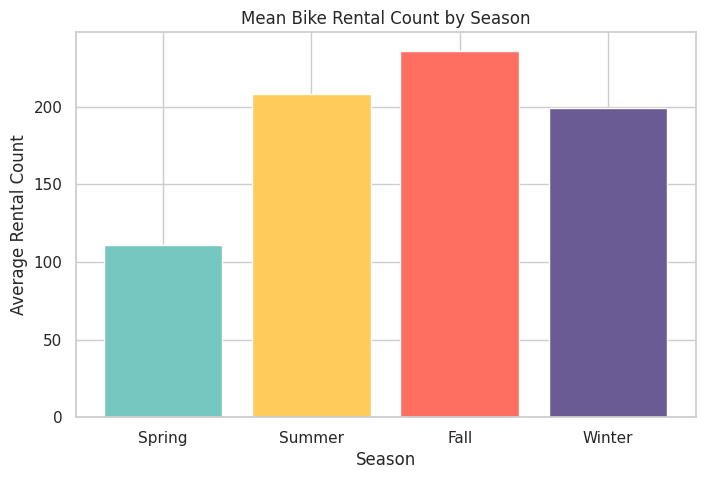

In [23]:
avg_season_df = bike_df.groupby('season')['count'].mean()
plt.figure(figsize=(8, 5))
plt.bar(avg_season_df.index, avg_season_df.values, color=season_colors)
plt.xticks([1, 2, 3, 4], ['Spring', 'Summer', 'Fall', 'Winter'])
plt.title('Mean Bike Rental Count by Season')
plt.xlabel('Season')
plt.ylabel('Average Rental Count')
plt.show()

Melakukan pengelompokkan data berdasarkan musimnya dan perhitungan rata-rata jumlah penyewaan sepeda tiap musimnya. Ubah nama seasonnya menjadi nama sebenarnya. Set label sumbu x menjadi season dan label sumbu y berupa rata-rata jumlah penyewaan.

Dari gambar yang di atas, terdapat grafik yang menunjukkan rata-rata jumlah penyewaan sepeda berdasarkan musim. Data yang terlihat:

- Musim Semi (Spring): Sekitar 150-200 penyewaan
- Musim Panas (Summer): Sekitar 200 penyewaan (tertinggi)
- Musim Gugur (Fall): Sekitar 150 penyewaan
- Musim Dingin (Winter): Kurang dari 100 penyewaan (terendah)

**Insight:**

1. Penyewaan sepeda tertinggi terjadi di musim panas.
2. Penyewaan sepeda cenderung menurun signifikan di musim dingin.
3. Musim semi dan musim gugur memiliki jumlah penyewaan yang mirip, tetapi masih lebih rendah dari musim panas.

#### Bagaimana rata-rata penyewaan sepeda pada hari kerja dan hari libur?

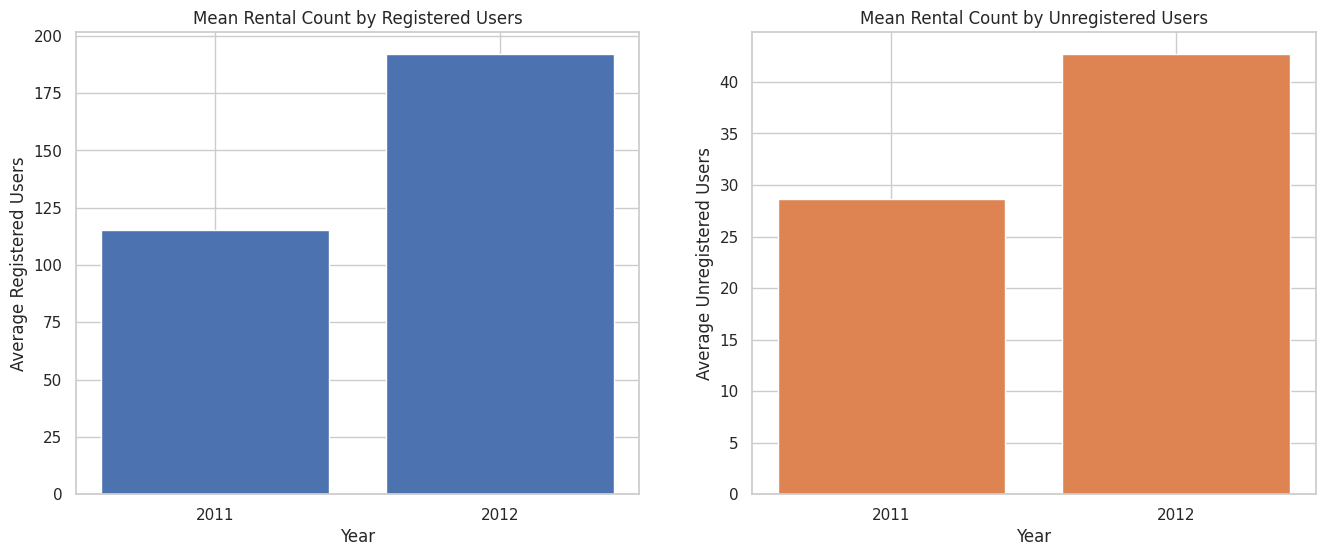

In [24]:
avg_registered_df = bike_df.groupby('year')['registered'].mean()
avg_unregistered_df = bike_df.groupby('year')['unregistered'].mean()
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

ax[0].bar(avg_registered_df.index, avg_registered_df.values, color="#4C72B0")
ax[0].set_title('Mean Rental Count by Registered Users')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Average Registered Users')
ax[0].set_xticks([0, 1])
ax[0].set_xticklabels(['2011', '2012'])

ax[1].bar(avg_unregistered_df.index, avg_unregistered_df.values, color="#DD8452")
ax[1].set_title('Mean Rental Count by Unregistered Users')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Average Unregistered Users')
ax[1].set_xticks([0, 1])
ax[1].set_xticklabels(['2011', '2012'])

plt.show()

Melakukan pengelompokkan data berdasarkan tahun dan perhitungan rata-rata jumlah penyewaan sepeda tiap tahunnya untuk setiap jenis pengguna. Ubah nama tahun menjadi nama sebenarnya. Set label sumbu x menjadi tahun dan label sumbu y berupa rata-rata jumlah penyewaan.

Membuat subplot dengan 2 kolom. Kolom pertama untuk menunjukan registered users dan kolom kedua untuk unregistered users.

Dari grafik yang ditampilkan:

- Pengguna terdaftar mengalami peningkatan yang signifikan dalam jumlah penyewaan rata-rata dari sekitar 110-120 di tahun 2011 menjadi hampir 200 di tahun 2012. Ini menunjukkan adanya pertumbuhan signifikan dalam penggunaan layanan oleh pengguna terdaftar.

- Pengguna tidak terdaftar juga mengalami peningkatan, meskipun dalam skala yang lebih kecil, dari sekitar 30 penyewaan di tahun 2011 menjadi lebih dari 40 penyewaan di tahun 2012. Ini bisa mengindikasikan bahwa layanan semakin dikenal oleh publik, tetapi mayoritas peningkatan tetap berasal dari pengguna terdaftar.

**Insights :**

1. Tren peningkatan peminjaman lebih dominan pada pengguna terdaftar, menandakan bahwa sistem berlangganan atau fitur eksklusif mungkin berkontribusi dalam meningkatkan retensi pelanggan.
2. Pengguna tidak terdaftar juga meningkat, yang bisa menjadi peluang untuk mengonversi mereka menjadi pelanggan tetap melalui promosi atau program keanggotaan.
3. Secara keseluruhan, layanan ini mengalami pertumbuhan yang positif dari tahun ke tahun.

#### Bagaimana distribusi permintaan peminjaman sepeda pada hari kerja dan hari libur?

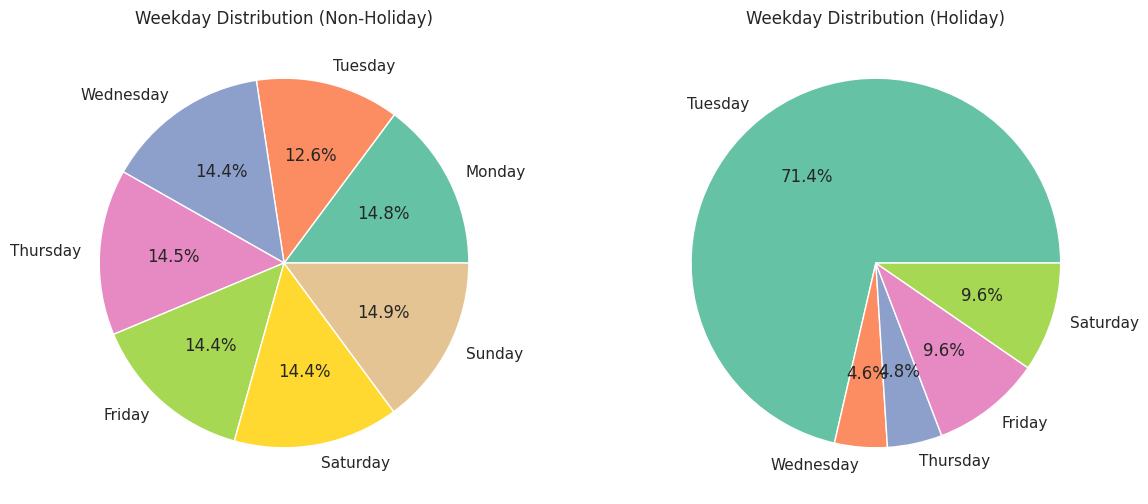

In [25]:
weekday_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
holiday_0 = bike_df[bike_df['holiday'] == 0]
holiday_1 = bike_df[bike_df['holiday'] == 1]
weekday_counts_0 = holiday_0['weekday'].value_counts().sort_index()
weekday_counts_1 = holiday_1['weekday'].value_counts().sort_index()

colors = sns.color_palette("Set2")

fig, ax = plt.subplots(1, 2, figsize=(14, 6))
ax[0].pie(weekday_counts_0, labels=[weekday_names[idx] for idx in weekday_counts_0.index], autopct='%1.1f%%', colors=colors)
ax[0].set_title('Weekday Distribution (Non-Holiday)')
ax[1].pie(weekday_counts_1, labels=[weekday_names[idx] for idx in weekday_counts_1.index], autopct='%1.1f%%', colors=colors)
ax[1].set_title('Weekday Distribution (Holiday)')
plt.show()


Melakukan pengelompokkan data berdasarkan hari kerja (holiday = 0) dan hari libur (holiday = 1) serta  perhitungan rata-rata jumlah penyewaan sepedanya. Ubah nama hari menjadi nama sebenarnya.

Menggunakan pie chart untuk memvisualisasikan distribusi datanya. Tiap potongan pie labelnya dari nama-nama hari yang telah sesuai dengan standard international (monday = 0, tuesday = 1, dst). Autopct='%1.1f%%' digunakan untuk menampilkan persentase di setiap potongan pie.

**1. Non-Holiday Distribution**

Distribusi penyewaan sepeda pada hari kerja terbagi cukup merata di semua hari, berkisar antara 12.6% hingga 14.9%.
Hari Selasa memiliki persentase penyewaan terendah (12.6%), sementara Minggu memiliki persentase tertinggi (14.9%).
Ini menunjukkan bahwa pada hari-hari biasa, pengguna sepeda tersebar dengan tidak ada hari yang mendominasi secara signifikan.

**2. Holiday Distribution**

Hari Selasa mendominasi secara ekstrem (71.4%), menandakan bahwa mayoritas penyewaan sepeda saat hari libur terjadi pada hari ini.
Hari-hari lain memiliki persentase yang jauh lebih kecil (di bawah 10%), dengan hari Rabu menjadi yang paling sedikit (4.8%).
Ini bisa mengindikasikan bahwa hari Selasa kemungkinan besar bertepatan dengan hari libur besar, sehingga terjadi lonjakan peminjaman sepeda.

**Insights :**
1. Pada hari biasa, penggunaan sepeda stabil dan tidak menunjukkan perbedaan signifikan antar hari.
2. Pada hari libur, terjadi anomali di mana penyewaan didominasi oleh satu hari tertentu (Selasa). Ini bisa menjadi indikasi bahwa hari itu adalah hari libur nasional atau event khusus yang menarik lebih banyak pengguna.

### Analisis Lanjutan

#### Bagaimana pola penggunaan sepeda berdasarkan hasil clustering tiap jamnya?

<ipython-input-26-25d8bac07fbd>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_df["Usage Category"] = bike_df["hour"].apply(categorize_hour)
<ipython-input-26-25d8bac07fbd>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Usage Category", y="count", data=bike_df, palette=["#6495ED", "#D3D3D3", "#FF6F61"])


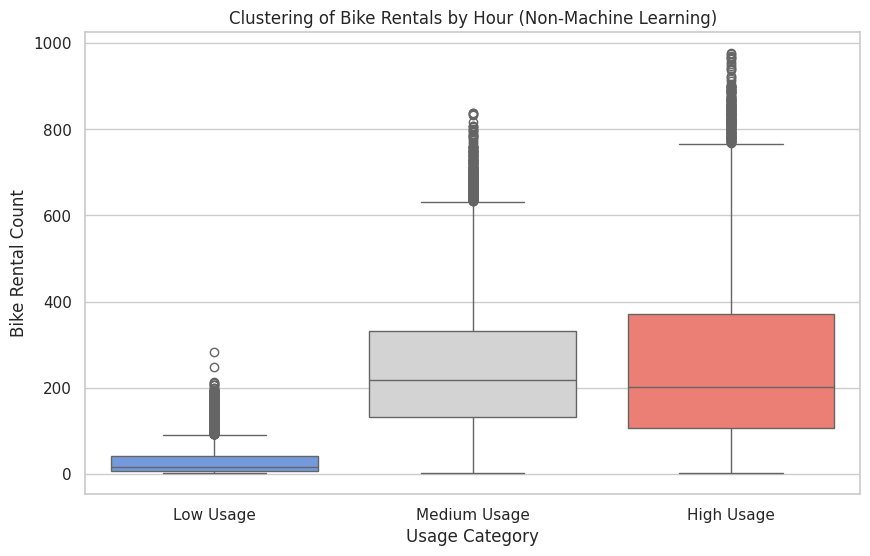

In [26]:
def categorize_hour(hour):
    if 0 <= hour <= 6:
        return "Low Usage"
    elif 7 <= hour <= 16:
        return "Medium Usage"
    else:
        return "High Usage"

bike_df["Usage Category"] = bike_df["hour"].apply(categorize_hour)

# Visualisasi
plt.figure(figsize=(10, 6))
sns.boxplot(x="Usage Category", y="count", data=bike_df, palette=["#6495ED", "#D3D3D3", "#FF6F61"])
plt.xlabel("Usage Category")
plt.ylabel("Bike Rental Count")
plt.title("Clustering of Bike Rentals by Hour (Non-Machine Learning)")
plt.show()

Melakukan clustering manual berdasarkan ruled-based grouping yang membagi 3 distribusi order bike-sharing. Dibagi menjadi 3 clusters yakni, Low Usage, Medium Usage, dan High Usage.

- Low Usage (00:00 - 06:00)

Jumlah penyewaan rendah, mayoritas di bawah 50.
Ada beberapa outlier yang mencapai 200+, mungkin karena event khusus atau lonjakan tak terduga.

- Medium Usage (07:00 - 16:00)

Jumlah penyewaan lebih bervariasi, dengan median sekitar 200.
Distribusi lebih lebar, menunjukkan jam sibuk kantor/sekolah.

- High Usage (17:00 - 23:00)

Rentang penyewaan lebih besar dibanding kategori lain.
Beberapa outlier mencapai 900+, mungkin akibat lonjakan pengguna di jam pulang kerja.


**Insights :**
1. Puncak penyewaan terjadi pada kategori High Usage (17:00 - 23:00). Ini bisa jadi waktu ideal untuk menambah jumlah sepeda yang tersedia.
2. Pada kategori Medium Usage (07:00 - 16:00) tetap ramai, menunjukkan potensi untuk meningkatkan fasilitas parkir dan aksesibilitas di area kerja/sekolah.
3. Terakhir, Low Usage (00:00 - 06:00) menunjukkan sedikit permintaan, jadi bisa mengurangi jumlah sepeda yang tersedia saat jam ini untuk efisiensi operasional.

## Conclusion

#### Pertanyaan 1: Bagaimana rata-rata penyewaan pada setiap musim?

Data menunjukan bahwa rata-rata permintaan peminjaman sepeda tertinggi terjadi di musim gugur dan permintaan terendah terjadi di musim semi. Ketiga musim lainnya terlihat berada di antara angka 200, sedangkan musim semi tidak sampai rata-rata 150 permintaan.

#### Pertanyaan 2: Bagaimana rata-rata penyewaan sepeda pada hari kerja dan hari libur?

Total rata-rata permintaan peminjaman pada tahun 2012 lebih tinggi. Hal ini juga sebanding lurus dengan naiknya jumlah permintaan dari pengguna unregistered sebesar 48.28%. Walaupun begitu, gap nilai registered dan unregistered sangatlah jauh. Angka unregistered tidak menyentuh angka 100 pada tahun 2011 dan 2012.

#### Pertanyaan 3: Bagaimana distribusi permintaan peminjaman sepeda pada hari kerja dan hari libur?

Permintaan cenderung merata pada hari kerja, tetapi meningkat secara signifikan pada hari libur, terutama pada hari Selasa dengan presentase sebesar 71.4%. Kemungkinan pada hari kerja, sebagian penduduk menggunakan penyewaan sepeda dan menyewa sepeda sudah menjadi suatu hal yang mereka lakukan sehari-hari kerja.

#### Pertanyaan Analsis Lanjutan: Bagaimana pola penggunaan sepeda berdasarkan hasil clustering tiap jamnya?

Dari hasil analisis clustering manual terhadap jumlah peminjaman sepeda berdasarkan jam, dapat disimpulkan bahwa terdapat tiga kategori utama dalam pola peminjaman:

- Low Usage (Jam 0-6)
Pada periode ini, jumlah peminjaman sepeda sangat rendah, dengan sebagian besar peminjaman berada di bawah 100 unit. Hal ini wajar mengingat rentang waktu ini merupakan waktu istirahat malam hingga dini hari, di mana aktivitas luar
ruangan minim.

- Medium Usage (Jam 7-16)
Pada pagi hingga sore hari, jumlah peminjaman meningkat secara signifikan. Rentang peminjaman lebih luas dibandingkan dengan periode sebelumnya, menunjukkan bahwa sepeda digunakan untuk berbagai keperluan seperti transportasi ke kantor, sekolah, atau aktivitas siang hari lainnya.

- High Usage (Jam 17-23)
Jumlah peminjaman sepeda mencapai puncaknya pada sore hingga malam hari. Banyak peminjaman yang melebihi 400 unit, yang mengindikasikan bahwa sepeda banyak digunakan untuk perjalanan pulang kerja, rekreasi, atau aktivitas santai di malam hari.


Jam sore hingga malam merupakan waktu dengan permintaan tertinggi, sehingga penyedia layanan sepeda dapat mempertimbangkan peningkatan ketersediaan unit pada periode ini. Dini hari memiliki peminjaman terendah, sehingga jumlah sepeda yang tersedia bisa dikurangi untuk efisiensi.